This work is partly (FeatureSelector package) based on
https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

In [1]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector

/Users/t.wang/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
%store -r features_enc #read the features and labels data from previous notebook
%store -r labels

no stored variable #read the features and labels data from previous notebook


In [3]:
features_enc
# features_enc.to_csv('/Users/t.wang/Desktop/' + 'features_enc' +'.csv', index=False)

,seasonal = Regular,seasonal = Summer,seasonal = Holiday,seasonal = Break,seasonal is unknown,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = Calm,...,PERCENTILE(Sea Level PressurehPa - TemperatureC),PERCENTILE(Dew PointC - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Humidity - TemperatureC),PERCENTILE(TemperatureC - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Dew PointC - Humidity),PERCENTILE(Sea Level PressurehPa - WindDirDegrees),PERCENTILE(Dew PointC - WindDirDegrees)
feature_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,3.0,70.0,-2.0,1019.9,0,...,0.807102,0.592077,0.514370,0.658227,0.102950,0.223312,0.135265,0.326794,0.126369,0.111846
1,0,0,1,0,0,3.0,65.0,-3.0,1020.9,0,...,0.820864,0.528057,0.433394,0.604927,0.075654,0.186359,0.102114,0.380322,0.104623,0.082497
2,0,0,1,0,0,3.0,65.0,-3.0,1022.9,0,...,0.849453,0.528057,0.406478,0.604927,0.075654,0.147734,0.102114,0.380322,0.111770,0.082497
3,0,0,1,0,0,2.0,65.0,-4.0,1024.9,0,...,0.887850,0.528057,0.378117,0.615040,0.072460,0.104167,0.102114,0.366788,0.115724,0.078923
4,0,0,1,0,0,1.0,65.0,-5.0,1025.3,1,...,0.902981,0.528057,0.373707,0.625456,0.808014,0.088123,0.798130,0.354547,0.959626,0.785204
5,0,0,1,0,0,-1.0,75.0,-5.0,1026.3,1,...,0.931950,0.664462,0.493993,0.772126,0.779349,0.077783,0.840024,0.208257,0.968978,0.785204
6,0,0,1,0,0,-1.0,75.0,-5.0,1027.3,1,...,0.940313,0.664462,0.480839,0.772126,0.779349,0.068735,0.840024,0.208257,0.973768,0.785204
7,0,0,1,0,0,-1.0,75.0,-5.0,1028.3,1,...,0.948905,0.664462,0.468522,0.772126,0.779349,0.061055,0.840024,0.208257,0.979319,0.785204
8,0,0,1,0,0,-1.0,75.0,-5.0,1030.0,1,...,0.960842,0.664462,0.446624,0.772126,0.779349,0.045468,0.840024,0.208257,0.986238,0.785204


In [4]:
labels

array([142.25, 143.  , 160.  , ..., 276.75, 272.25, 264.25])

# Feature Selection - Filter methods

## Filter methods - Missing values

In [5]:
fs = FeatureSelector(data = features_enc, labels = labels)
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [6]:
fs.missing_stats.head()

,missing_fraction
seasonal = Regular,0.0
Humidity / Sea Level PressurehPa - TemperatureC / Sea Level PressurehPa,0.0
ABSOLUTE(WindDirDegrees) - TemperatureC / Sea Level PressurehPa,0.0
Dew PointC * TemperatureC - Sea Level PressurehPa / Humidity,0.0
Dew PointC / WindDirDegrees - TemperatureC / Dew PointC,0.0


In [7]:
# To see the features identified for removal, we access the ops attribute of the FeatureSelector
# However, no features with missing values greater than 0.6
missing_features = fs.ops['missing']
missing_features[:5]

[]

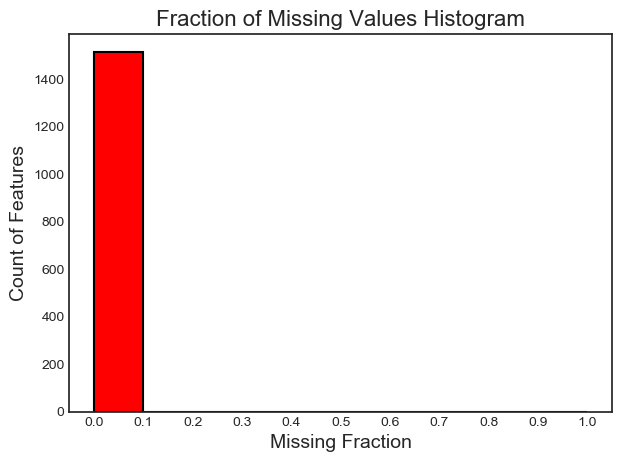

In [8]:
# Distribution of missing values in all features
fs.plot_missing()

## Filter methods - Collinear features

In [9]:
fs.identify_collinear(correlation_threshold = 0.98)

551 features with a correlation magnitude greater than 0.98.



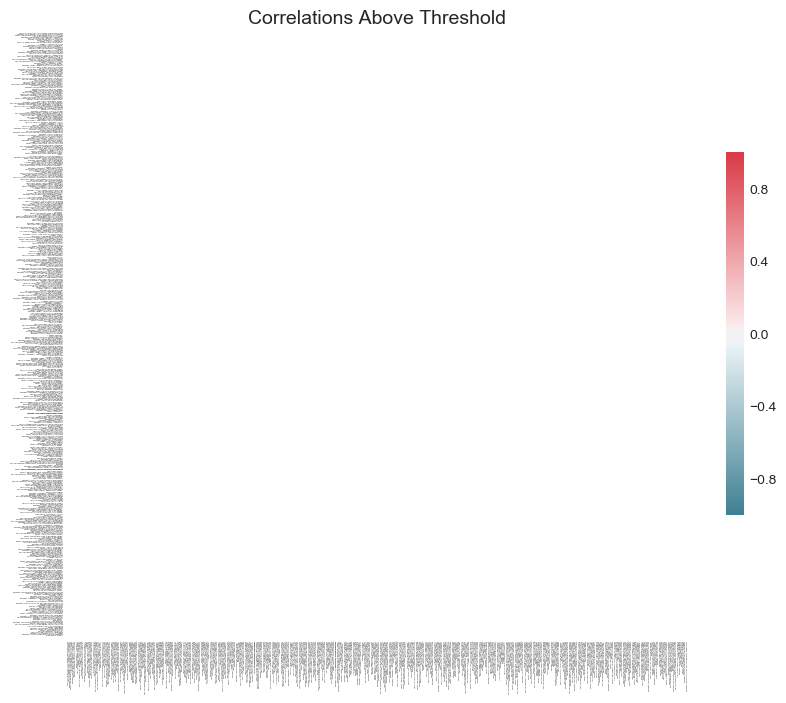

In [10]:
# heatmap shows all the features that have at least one correlation above the threshold
fs.plot_collinear()#plot_all=True)

In [11]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(10)

,drop_feature,corr_feature,corr_value
0,Humidity / Sea Level PressurehPa,Humidity,0.999748
1,WindDirDegrees / Sea Level PressurehPa,WindDirDegrees,0.999922
2,Dew PointC / Sea Level PressurehPa,Dew PointC,0.999972
3,TemperatureC / Sea Level PressurehPa,TemperatureC,0.999959
4,Sea Level PressurehPa * TemperatureC,TemperatureC,0.999959
5,Sea Level PressurehPa * TemperatureC,TemperatureC / Sea Level PressurehPa,0.999836
6,Sea Level PressurehPa * WindDirDegrees,WindDirDegrees,0.999922
7,Sea Level PressurehPa * WindDirDegrees,WindDirDegrees / Sea Level PressurehPa,0.999689
8,Humidity * Sea Level PressurehPa,Humidity,0.999748
9,Humidity * Sea Level PressurehPa,Humidity / Sea Level PressurehPa,0.998991


## Filter methods - Zero importance features according to a gradient boosting machine (GBM) learning model (Not sure why it is not working after replacing inf with 9999)

In [ ]:
# # Pass in the appropriate parameters
# fs.identify_zero_importance(task = 'regression', 
#                             eval_metric = '12', 
#                             n_iterations = 10)
# #                              early_stopping = True)
# # eval_metric, 'auc' for classificaiton, '12' for regression
# # list of zero importance features
# zero_importance_features = fs.ops['zero_importance']

In [ ]:
# # plot the feature importances
# fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

## Filter methods - Low importance features (Not working if the Zero importance one fails)

In [ ]:
# fs.identify_low_importance(cumulative_importance = 0.99)

# # Based on Zero importance method
# # The low_importance method borrows from one of the methods of using Principal Components Analysis (PCA) 
# # where it is common to keep only the PC needed to retain a certain percentage of the variance (such as 95%). 
# # The percentage of total importance accounted for is based on the same idea.

In [ ]:
# fs.feature_importances.head(10)

## Filter methods - Single unique value features

In [12]:
fs.identify_single_unique()

6 features with a single unique value.



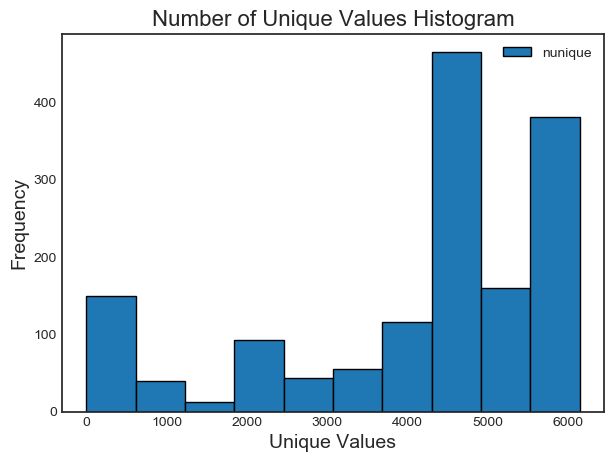

In [13]:
fs.plot_unique()

## Filter methods - Removing identified features 

In [14]:
# Remove the features from all methods (returns a df), 
# also remove the one-hot encoded features that are created during machine learning
train_removed_all = fs.remove(methods = ['missing', 'single_unique', 'collinear'], keep_one_hot=True)

Removed 557 features.


In [15]:
train_removed_all

,seasonal = Regular,seasonal = Summer,seasonal = Holiday,seasonal = Break,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = Calm,Wind Direction = South,...,PERCENTILE(Dew PointC / Humidity),PERCENTILE(TemperatureC / Dew PointC),PERCENTILE(Dew PointC / TemperatureC),PERCENTILE(TemperatureC / WindDirDegrees),PERCENTILE(TemperatureC / Humidity),PERCENTILE(TemperatureC * WindDirDegrees),PERCENTILE(Dew PointC * Humidity),PERCENTILE(Dew PointC * TemperatureC),PERCENTILE(Dew PointC * WindDirDegrees),PERCENTILE(Humidity * WindDirDegrees)
feature_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,3.0,70.0,-2.0,1019.9,0,0,...,0.241028,0.097617,0.113657,0.172712,0.216165,0.459170,0.223236,0.118385,0.133516,0.916210
1,0,0,1,0,3.0,65.0,-3.0,1020.9,0,0,...,0.198145,0.114039,0.097235,0.171477,0.222324,0.463200,0.180505,0.101049,0.099909,0.906250
2,0,0,1,0,3.0,65.0,-3.0,1022.9,0,0,...,0.198145,0.114039,0.097235,0.171477,0.222324,0.463200,0.180505,0.101049,0.099909,0.906250
3,0,0,1,0,2.0,65.0,-4.0,1024.9,0,0,...,0.167351,0.144974,0.066300,0.159129,0.198905,0.425563,0.142488,0.106372,0.073905,0.906250
4,0,0,1,0,1.0,65.0,-5.0,1025.3,1,0,...,0.139066,0.163535,0.047663,0.910403,0.172825,0.194495,0.112835,0.126901,0.360858,0.121655
5,0,0,1,0,-1.0,75.0,-5.0,1026.3,1,0,...,0.156478,0.223572,0.987702,0.026316,0.096563,0.194495,0.099909,0.267336,0.360858,0.121655
6,0,0,1,0,-1.0,75.0,-5.0,1027.3,1,0,...,0.156478,0.223572,0.987702,0.026316,0.096563,0.194495,0.099909,0.267336,0.360858,0.121655
7,0,0,1,0,-1.0,75.0,-5.0,1028.3,1,0,...,0.156478,0.223572,0.987702,0.026316,0.096563,0.194495,0.099909,0.267336,0.360858,0.121655
8,0,0,1,0,-1.0,75.0,-5.0,1030.0,1,0,...,0.156478,0.223572,0.987702,0.026316,0.096563,0.194495,0.099909,0.267336,0.360858,0.121655


Number of features is reduced from 1513 to 956  after series of Filter methods (No model importance method applied)

### Little test, it takes 5min for fitting, we need to reduce number of features further

In [16]:
from sklearn.ensemble import RandomForestRegressor



X_train, y_train = (train_removed_all, labels)
# X_train.to_csv('/Users/t.wang/Desktop/' + 'X_train' +'.csv', index=False)

random_forest = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9744210092751955

## Filter methods - Feature selection using SelectFromModel

In [21]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

In [23]:
m = SelectFromModel(LinearSVR())
m.fit(X_train, y_train)

/Users/t.wang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                    fit_intercept=True, intercept_scaling=1.0,
                                    loss='epsilon_insensitive', max_iter=1000,
                                    random_state=None, tol=0.0001, verbose=0),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [24]:
m.transform(X_train).shape

(6576, 213)

In [27]:
pd.DataFrame(m.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,1,960,-140,-6,-640,210,22400,-3733.33,-11898.8,-2.12479,...,-22400,-1469.95,510.169,186.667,-936.667,-22400.5,-1019.9,-960.5,-71393,-163.333
1,0,990,-195,-9,-990,195,21450,-2383.33,-7373.17,-3.09364,...,-21450,-1330.3,340.497,173.333,-968.333,-21450.3,-1020.9,-990.333,-66358.5,-216.667
2,1,990,-195,-9,-990,195,21450,-2383.33,-7387.61,-3.0997,...,-21450,-1330.97,341.164,173.333,-968.333,-21450.3,-1022.9,-990.333,-66488.5,-216.667
3,1,660,-260,-8,-1320,130,21450,-2681.25,-8327.31,-6.21152,...,-21450,-916.225,256.422,97.5,-627.5,-21450.2,-1024.9,-660.25,-66618.5,-292.5
4,1,0,-325,-5,-0,65,0,-0,-13328.9,-9999,...,9999,-205.06,9999,0,65,-0.2,9999,-0.2,-9999,-390
5,1,-0,-375,5,-0,-75,0,0,15394.5,9999,...,9999,-205.26,9999,0,-75,-0.2,9999,-0.2,-9999,-300
6,1,-0,-375,5,-0,-75,0,0,15409.5,9999,...,9999,-205.46,9999,0,-75,-0.2,9999,-0.2,-9999,-300
7,1,-0,-375,5,-0,-75,0,0,15424.5,9999,...,9999,-205.66,9999,0,-75,-0.2,9999,-0.2,-9999,-300
8,1,-0,-375,5,-0,-75,0,0,15450,9999,...,9999,-206,9999,0,-75,-0.2,9999,-0.2,-9999,-300
9,1,0,-300,-0,-1240,0,23250,-9999,-9999,-9999,...,-23250,-257.85,258.092,-9999,9999,-23250.2,-1031.4,-0.25,-77355,-9999


In [28]:
random_forest_n = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True)
random_forest_n.fit(m.transform(X_train), y_train)
random_forest_n.score(m.transform(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9414090144853559